In [131]:
import numpy as np
import time, os, sys
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 100
from cellpose import utils, io, models
import pandas as pd
from scipy import stats
import skimage
import seaborn as sns

The purpose of this notebook is to pool all the measured data and compare trends across embryos

# Import data

## 20220117 

### series5

In [132]:
df_20220117_s5_t4_z5 = pd.read_csv('../outputs/20220117_series5/20220117_series5_t4_z5_measurements.csv')

In [133]:
# I'm only keeping the normal nuclei here because those were the nuclei that were most 
# visible at this z-slice.
df_20220117_s5_t4_z5 = df_20220117_s5_t4_z5[df_20220117_s5_t4_z5['tag'] != 'delayed']

In [134]:
df_20220117_s5_t4_z14 = pd.read_csv('../outputs/20220117_series5/20220117_series5_t4_z14_measurements.csv')

In [135]:
# Keeping measurements of nuclei that are delayed here to compare with normal nuclei
# at z=5
df_20220117_s5_t4_z14 = df_20220117_s5_t4_z14[df_20220117_s5_t4_z14['tag'] == 'delayed']

In [136]:
df_20220117_s5_t4 = pd.concat([df_20220117_s5_t4_z14, df_20220117_s5_t4_z5])

In [137]:
df_20220117_s5_t3_z10 = pd.read_csv('../outputs/20220117_series5/20220117_series5_t3_z10_measurements.csv')

In [138]:
df_20220117_s5_t3_z10 = df_20220117_s5_t3_z10[df_20220117_s5_t3_z10['tag'] != 'delayed']
df_20220117_s5_t3_z15 = pd.read_csv('../outputs/20220117_series5/20220117_series5_t3_z15_measurements.csv')
df_20220117_s5_t3_z15 = df_20220117_s5_t3_z15[df_20220117_s5_t3_z15['tag'] == 'delayed']
df_20220117_s5_t3 = pd.concat([df_20220117_s5_t3_z15, df_20220117_s5_t3_z10])

In [139]:
df_20220117_s5_t2_z10 = pd.read_csv('../outputs/20220117_series5/20220117_series5_t2_z10_measurements.csv')

In [202]:
df_20220117_s5_t0_z08 = pd.read_csv('../outputs/20220117_series5/20220117_series5_t0_z8_measurements.csv')

In [141]:
df_20220117_s5_t7_z04 = pd.read_csv('../outputs/20220117_series5/20220117_series5_t7_z04_measurements.csv')

In [142]:
df_20220117_s5_t7_z04 = df_20220117_s5_t7_z04[df_20220117_s5_t7_z04['tag'] == 'normal']

In [143]:
df_20220117_s5_t7_z14 = pd.read_csv('../outputs/20220117_series5/20220117_series5_t7_z14_measurements.csv')
df_20220117_s5_t7_z14 = df_20220117_s5_t7_z14[df_20220117_s5_t7_z14['tag'] == 'delayed']

In [144]:
df_20220117_s5_t7 = pd.concat([df_20220117_s5_t7_z04, df_20220117_s5_t7_z14])

### series 8

In [145]:
df_20220117_s8_t9_z13 = pd.read_csv('../outputs/20220117_series8/20220117_series8_t9_z13_measurements.csv')

In [146]:
# I'm only keeping the normal nuclei here because those were the nuclei that were most 
# visible at this z-slice.
df_20220117_s8_t9_z13 = df_20220117_s8_t9_z13[df_20220117_s8_t9_z13['tag'] != 'delayed']

In [147]:
df_20220117_s8_t9_z20 = pd.read_csv('../outputs/20220117_series8/20220117_series8_t9_z20_measurements.csv')

In [148]:
# Keeping measurements only for delayed nuclei at this optical slice
df_20220117_s8_t9_z20 = df_20220117_s8_t9_z20[df_20220117_s8_t9_z20['tag'] == 'delayed']

In [149]:
df_20220117_s8_t9 = pd.concat([df_20220117_s8_t9_z20, df_20220117_s8_t9_z13])

### series 9

In [150]:
# Delayed and normal nuclei were co-planar
df_20220117_s9_t3 = pd.read_csv('../outputs/20220117_series9/20220117_series9_t3_z13_measurements.csv')

### series 2

In [151]:
df_20220117_s2_t12_z16 = pd.read_csv('../outputs/20220117_series2/20220117_series2_t12_z16_measurements.csv')

In [152]:
df_20220117_s2_t12_z16 = df_20220117_s2_t12_z16[df_20220117_s2_t12_z16['tag'] != 'delayed']

In [153]:
df_20220117_s2_t12_z25 = pd.read_csv('../outputs/20220117_series2/20220117_series2_t12_z25_measurements.csv')

In [154]:
df_20220117_s2_t12_z25 = df_20220117_s2_t12_z25[df_20220117_s2_t12_z25['tag'] == 'delayed']

In [155]:
df_20220117_s2_t12 = pd.concat([df_20220117_s2_t12_z25, df_20220117_s2_t12_z16])

## 20220116

### series 2

In [156]:
df_20220116_s2_z16 = pd.read_csv('../outputs/20220116_series2/20220116_series2_t6_z16_measurements.csv')
df_20220116_s2_z16 = df_20220116_s2_z16[df_20220116_s2_z16['tag'] != 'delayed']
df_20220116_s2_z20 = pd.read_csv('../outputs/20220116_series2/20220116_series2_t6_z20_measurements.csv')
df_20220116_s2_z20 = df_20220116_s2_z20[df_20220116_s2_z20['tag'] == 'delayed']

In [157]:
df_20220116_s2 = pd.concat([df_20220116_s2_z20, df_20220116_s2_z16])

### series 4

In [158]:
df_20220116_s4 = pd.read_csv('../outputs/20220116_series4/20220116_series4_t3_z16_measurements.csv')

## Merge data

In [159]:
df = pd.concat([df_20220116_s2, df_20220116_s4, df_20220117_s2_t12,
                df_20220117_s5_t4, df_20220117_s8_t9, df_20220117_s9_t3])

In [372]:
# This code block added because I began exploring timeframes before NEB for series 5
df = pd.concat([df, df_20220117_s5_t3])

In [480]:
# This code block added because I began exploring timeframes before NEB for series 5
df = pd.concat([df, df_20220117_s5_t2_z10])

In [484]:
# This code block added because I began exploring timeframes before NEB for series 5
df = pd.concat([df, df_20220117_s5_t0_z08])

# Data exploration

In [160]:
df.to_csv('../outputs/merged_data.csv')

In [161]:
df.columns

Index(['Unnamed: 0', 'label', 'centroid-0', 'centroid-1', 'area', 'bbox-0',
       'bbox-1', 'bbox-2', 'bbox-3', 'intensity_image',
       'mean_intensity_Sqh-mCh', 'mean_intensity_YFP', 'mean_intensity_CFP',
       'mean_intensity_FRET', 'slice', 'mean_intensity_YFP_corr',
       'mean_intensity_YFP_bg', 'mean_intensity_CFP_corr_seg',
       'mean_intensity_CFP_bg', 'mean_intensity_FRET_corr_seg',
       'mean_intensity_FRET_bg', 'FRET/CFP', 'YFP/CFP', 'FRET/YFP',
       'FRET/CFP bg_sub', 'YFP/CFP bg_sub', 'FRET/YFP bg_sub', 'FRET/CFP cyto',
       'YFP/CFP cyto', 'FRET/YFP cyto', 'tag', 'metadata'],
      dtype='object')

In [162]:
df_roi = df[df['tag'] != 'other']

In [163]:
df['correction'] = df['FRET/CFP'] - 0.38 - (0.11 * df['YFP/CFP']) # Given the calculations Fabio and I did

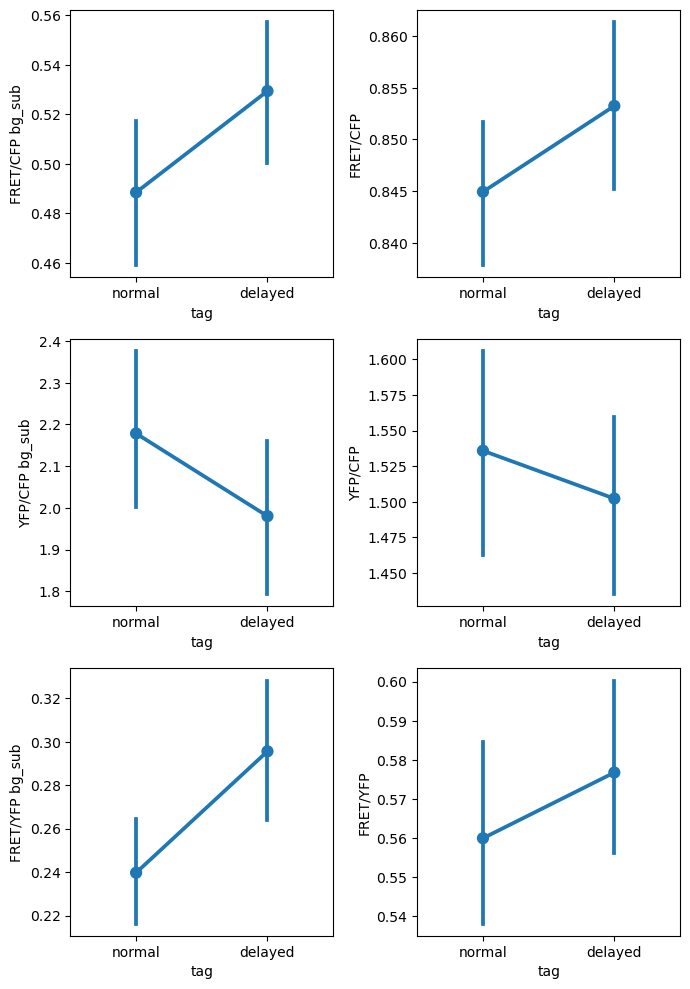

In [164]:
# Visualize the different ways to calculate the emission ratios and the effects of 
# background subtraction
fig, ax = plt.subplots(3,2, figsize=(7, 10))
sns.pointplot(ax=ax[0,0], x='tag', y='FRET/CFP bg_sub', data=df_roi,
             order=['normal', 'delayed'])
sns.pointplot(ax=ax[0,1], x='tag', y='FRET/CFP', data=df_roi,
             order=['normal', 'delayed'])
sns.pointplot(ax=ax[1,0], x='tag', y='YFP/CFP bg_sub', data=df_roi,
             order=['normal', 'delayed'])
sns.pointplot(ax=ax[1,1], x='tag', y='YFP/CFP', data=df_roi,
             order=['normal', 'delayed'])
sns.pointplot(ax=ax[2,0], x='tag', y='FRET/YFP bg_sub', data=df_roi,
             order=['normal', 'delayed'])
sns.pointplot(ax=ax[2,1], x='tag', y='FRET/YFP', data=df_roi,
             order=['normal', 'delayed'])
plt.tight_layout()

From the results above, it's clear that trends between emission ratio measurements remain the same with or without background subtraction. It's just that the background subtraction seems to tighten the variation.

I also would like to note that this method may not be sensitive enough to detect the differences between the two populations, at least in terms to the nuclear region ROI. 

With some considerations on the contributions of background signal to the ratio, I think I ruled out FRET/YFP as an emission ratio. This seemed to have been backed by Fred Schaufele. This leaves us with the YFP/CFP and the FRET/CFP ratio. The FRET/CFP ratio is the one that seems to be well used by the groups that have used this construct, so we'll consider this moving forward. 

A big reason to not consider the YFP/CFP ratio is with the following plot:

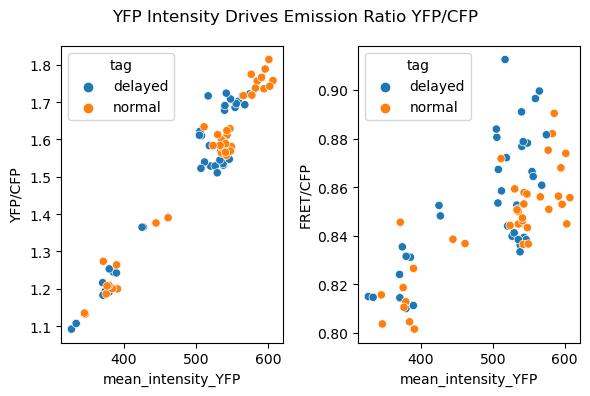

In [165]:
fig, ax = plt.subplots(1, 2)
sns.scatterplot(ax=ax[0],x='mean_intensity_YFP', y='YFP/CFP', data=df_roi, hue='tag')
sns.scatterplot(ax=ax[1],x='mean_intensity_YFP', y='FRET/CFP', data=df_roi, hue='tag')
plt.suptitle('YFP Intensity Drives Emission Ratio YFP/CFP')
plt.tight_layout()

Notice how biosensor abundance is driving the ratio. This is not what we want because our signals are now confounded. On the other hand, there is still some abundance issues that's giving a positive correlation in the FRET/CFP emission ratio. Fabio and I thought a little bit about how to correct for this and we came up with a formula on how it could be the case assuming that the ratio $\begin{equation} \\ \beta = CFP_{443/545}/CFP_{443/483} \end{equation}$ was constant and that $\\ YFP_{443/545}$ was proportional to $YFP_{491/545}$ by some factor $\alpha$.

The result is below

Text(0, 0.5, 'Corrected FRET/CFP')

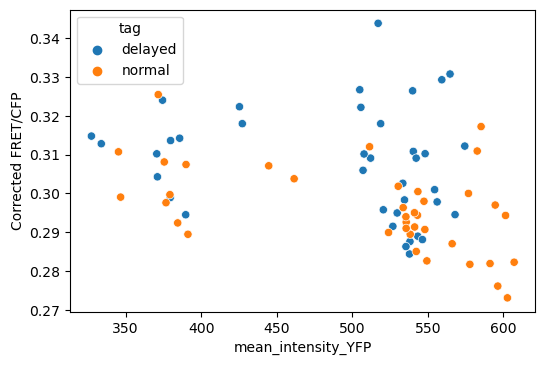

In [166]:
sns.scatterplot(x='mean_intensity_YFP', y='correction', data=df[df['tag'] != 'other'], hue='tag')
plt.ylabel('Corrected FRET/CFP')

Next, we wanted to just label by metadata to show which embryo the data was taken from.

In [167]:
df['embryo'] = [df.iloc[i]['metadata'].split('_t')[0] for i in range(len(df))]

Below, we can compare the trends across embryos.

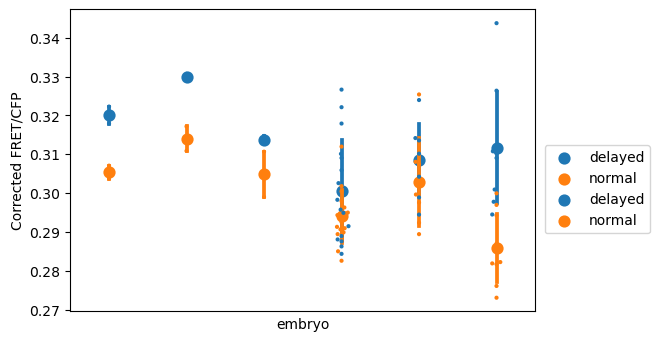

In [168]:
ax = sns.pointplot(x='embryo', y='correction', hue='tag', ci='sd', data=df[df['tag'] != 'other'],
                linewidth=1.5, edgecolor='black', errcolor='black', join=False)
ax = sns.swarmplot(x='embryo', y='correction', hue='tag', data=df[df['tag'] != 'other'], size=3)
#plt.ylim(0.775, 0.95)
plt.xticks([])
plt.ylabel('Corrected FRET/CFP')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

We can see that across different embryos, the trend holds that delayed nuclei have a higher emission ratio than normal nuclei. Pooled together, we see the data summarized:

Text(0.5, 1.0, 'Delayed nuclei have a higher Emission Ratio')

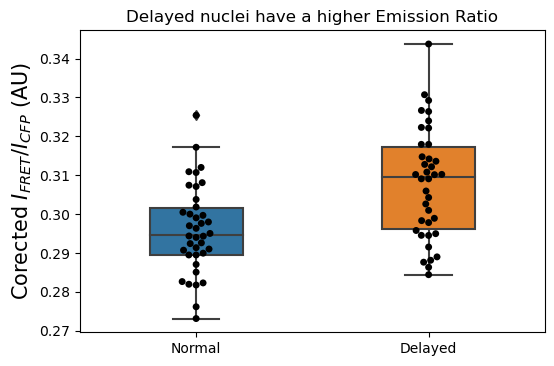

In [169]:
ax = sns.boxplot(x='tag', y='correction', data=df[df['tag'] != 'other'], width=0.4, order=['normal', 'delayed'])
ax = sns.swarmplot(x='tag', y='correction', data=df[df['tag'] != 'other'], size=5, color='black', order=['normal', 'delayed'])
#plt.ylim(0.775, 0.95)
plt.xticks([0, 1])
ax.set_xticklabels(['Normal', 'Delayed'])
plt.xlabel('')
plt.ylabel('Corected $I_{FRET}/I_{CFP}$ (AU)', fontsize=15)
plt.title('Delayed nuclei have a higher Emission Ratio')
#plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

In [170]:
df['correction cyto'] = df['FRET/CFP cyto'] - 0.38 - (0.11 * df['YFP/CFP cyto'])

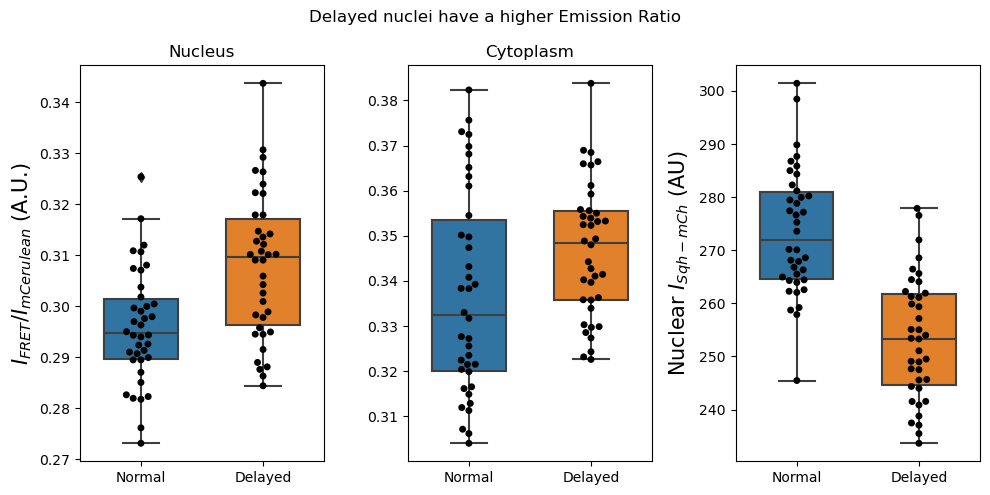

In [185]:
fig, ax = plt.subplots(1, 3, figsize=(10,5))
sns.boxplot(ax=ax[0], x='tag', y='correction', data=df[df['tag'] != 'other'], width=0.6,
                order=['normal', 'delayed'],)
                #palette={'normal': 'black', 'delayed':'red'})
sns.swarmplot(ax=ax[0], x='tag', y='correction', data=df[df['tag'] != 'other'], color='black',
                  order=['normal', 'delayed'])
ax[0].set_xticks([0,1])
ax[0].set_xticklabels(['Normal', 'Delayed'], fontsize=10)
ax[0].set_xlabel('')
ax[0].set_ylabel('$I_{FRET}/I_{mCerulean}$ (A.U.)', fontsize=15)
ax[0].set_title('Nucleus')

sns.boxplot(ax=ax[1], x='tag', y='correction cyto', data=df[df['tag'] != 'other'], width=0.6,
                order=['normal', 'delayed'])
sns.swarmplot(ax=ax[1], x='tag', y='correction cyto', data=df[df['tag'] != 'other'], color='black',
                  order=['normal', 'delayed'])
ax[1].set_xticks([0,1])
ax[1].set_xticklabels(['Normal', 'Delayed'], fontsize=10)
ax[1].set_xlabel('')
ax[1].set_ylabel('', fontsize=15)
ax[1].set_title('Cytoplasm')

sns.boxplot(ax=ax[2], x='tag', y='mean_intensity_Sqh-mCh', data=df[df['tag'] != 'other'], width=0.6,
                order=['normal', 'delayed'],)
sns.swarmplot(ax=ax[2], x='tag', y='mean_intensity_Sqh-mCh', data=df[df['tag'] != 'other'], color='black',
                  order=['normal', 'delayed'])
ax[2].set_xticks([0,1])
ax[2].set_xticklabels(['Normal', 'Delayed'], fontsize=10)
ax[2].set_xlabel('')
ax[2].set_ylabel('Nuclear $I_{Sqh-mCh}$ (AU)', fontsize=15)
plt.suptitle('Delayed nuclei have a higher Emission Ratio')
plt.tight_layout()

In [184]:
stats.ttest_rel(a=df[df['tag'] == 'normal']['FRET/CFP'],
                b=df[df['tag'] == 'delayed']['FRET/CFP'])

Ttest_relResult(statistic=-3.4555662838625003, pvalue=0.0013944446038101526)

The statistics above says that the differences we see is significant. It's hard for me to interpret this, however, because the changes that we're interested in is so small (~.01) difference. On the other hand, this also seems plausible given that even from Deneke et al's data, the full range of the CDK1-FRET biosensor is ~.06.

If we looked at the difference between the means and normalized it to the range of the dataset, we find that the difference between the means is around 7%.

In [104]:
abs(df[df['tag'] == 'normal']['correction'].mean() - df[df['tag'] == 'delayed']['correction'].mean()) / (df['correction'].max() - df['correction'].min())

0.07030987790132084

Below, I also wanted to see if there's a correlation between CFP intensity and the corrected emission ratio.

Text(0, 0.5, 'Corrected FRET/CFP')

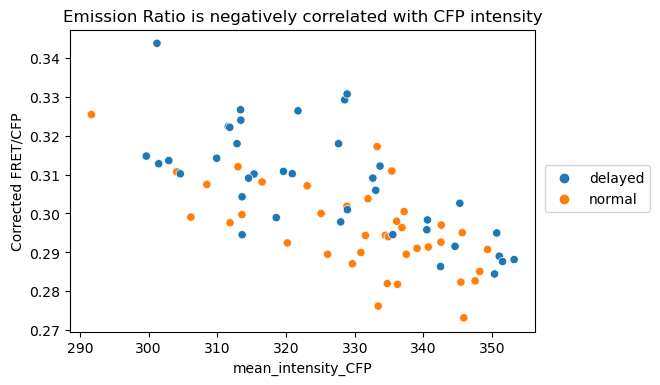

In [186]:
fig, ax = plt.subplots(1, 1)
sns.scatterplot(ax=ax,x='mean_intensity_CFP', y='correction', data=df[df['tag'] != 'other'], hue='tag',)
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
plt.title('Emission Ratio is negatively correlated with CFP intensity')
plt.ylabel('Corrected FRET/CFP')

# Time exploration

The result that we got was unexpected. We would have expected that Cdk1 activity is lower in delayed nuclei compared to the normal nuclei. However, we're seeing the opposite where normal nuclei have lower Cdk1 activity than the delayed nuclei. 

We then wondered whether we were not looking at the correct time frames. For this, I used the `20220117_series5` dataset because it has a lot of delayed nuclei. 

In [189]:
df_20220117_s5_t3['correction'] = df_20220117_s5_t3['FRET/CFP'] - 0.38 - (0.11 * df_20220117_s5_t3['YFP/CFP'])
df_20220117_s5_t3['cyto correction'] = df_20220117_s5_t3['FRET/CFP cyto'] - 0.38 - (0.11 * df_20220117_s5_t3['YFP/CFP cyto'])

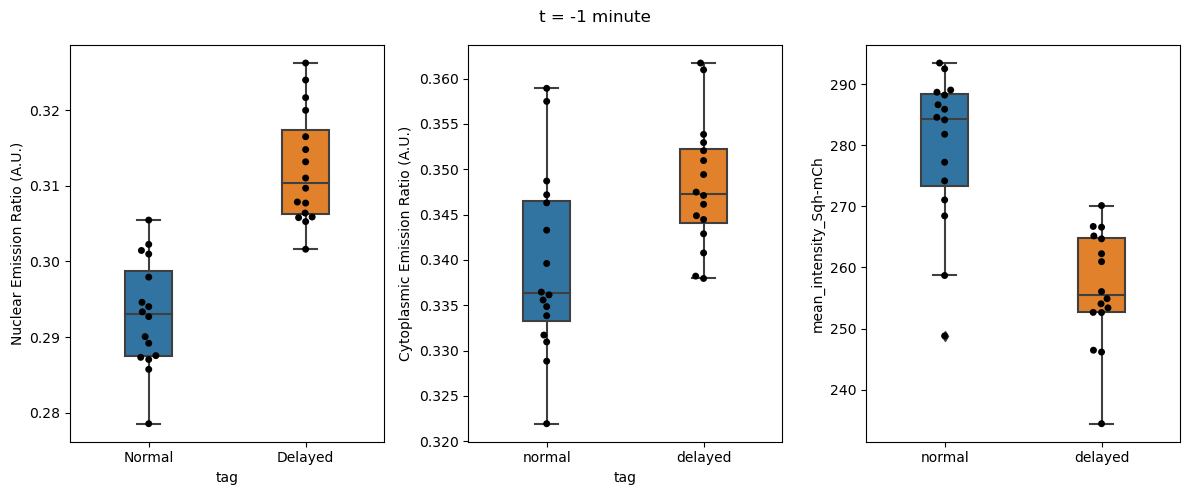

In [191]:
fig, ax = plt.subplots(1,3,figsize=(12,5))
sns.boxplot(ax=ax[0],x='tag', y='correction', data=df_20220117_s5_t3,
           order=['normal', 'delayed'], width=0.3)
sns.swarmplot(ax=ax[0],x='tag', y='correction', data=df_20220117_s5_t3,
              order=['normal', 'delayed'], color='black')
sns.boxplot(ax=ax[2], x='tag', y='mean_intensity_Sqh-mCh', data=df_20220117_s5_t3,
           order=['normal', 'delayed'], width=0.3)
sns.swarmplot(ax=ax[2],x='tag', y='mean_intensity_Sqh-mCh', data=df_20220117_s5_t3,
              order=['normal', 'delayed'], color='black')
sns.boxplot(ax=ax[1],x='tag', y='cyto correction', data=df_20220117_s5_t3,
           order=['normal', 'delayed'], width=0.3)
sns.swarmplot(ax=ax[1],x='tag', y='cyto correction', data=df_20220117_s5_t3,
              order=['normal', 'delayed'], color='black')
ax[0].set_ylabel('Nuclear Emission Ratio (A.U.)')
ax[1].set_ylabel('Cytoplasmic Emission Ratio (A.U.)')
ax[0].set_xticks([0,1])
ax[0].set_xticklabels(['Normal', 'Delayed'])
plt.suptitle('t = -1 minute')
plt.xlabel('')
plt.tight_layout()
#plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

In [192]:

df_20220117_s5_t2_z10['correction'] = df_20220117_s5_t2_z10['FRET/CFP'] - 0.38 - (0.11 * df_20220117_s5_t2_z10['YFP/CFP'])
df_20220117_s5_t2_z10['cyto correction'] = df_20220117_s5_t2_z10['FRET/CFP cyto'] - 0.38 - (0.11 * df_20220117_s5_t2_z10['YFP/CFP cyto'])


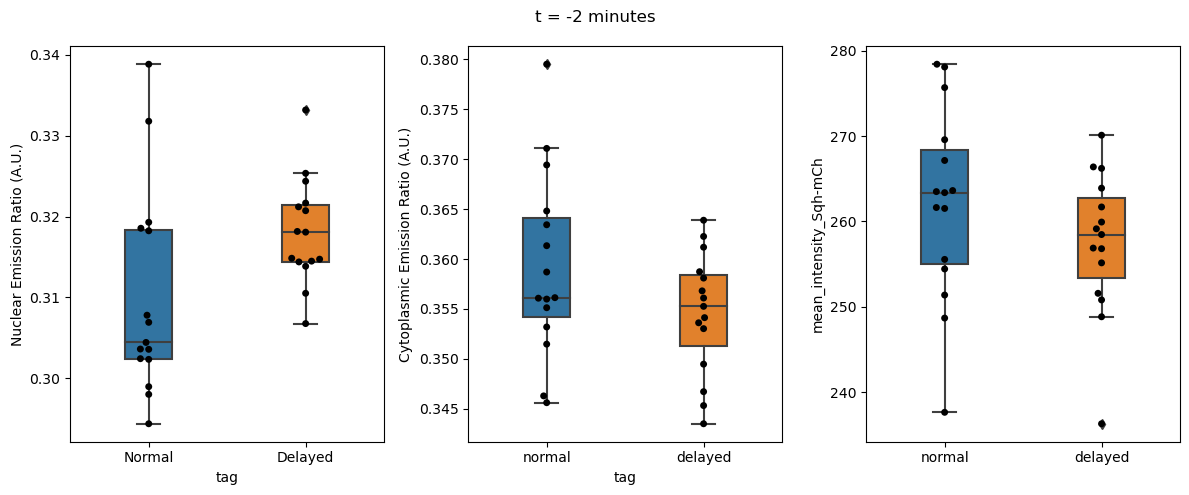

In [201]:
fig, ax = plt.subplots(1,3,figsize=(12,5))
sns.boxplot(ax=ax[0],x='tag', y='correction', data=df_20220117_s5_t2_z10,
           order=['normal', 'delayed'], width=0.3)
sns.swarmplot(ax=ax[0],x='tag', y='correction', data=df_20220117_s5_t2_z10,
              order=['normal', 'delayed'], color='black')
sns.boxplot(ax=ax[2], x='tag', y='mean_intensity_Sqh-mCh', data=df_20220117_s5_t2_z10,
           order=['normal', 'delayed'], width=0.3)
sns.swarmplot(ax=ax[2],x='tag', y='mean_intensity_Sqh-mCh', data=df_20220117_s5_t2_z10,
              order=['normal', 'delayed'], color='black')
sns.boxplot(ax=ax[1],x='tag', y='cyto correction', data=df_20220117_s5_t2_z10,
           order=['normal', 'delayed'], width=0.3)
sns.swarmplot(ax=ax[1],x='tag', y='cyto correction', data=df_20220117_s5_t2_z10,
              order=['normal', 'delayed'], color='black')
ax[0].set_ylabel('Nuclear Emission Ratio (A.U.)')
ax[1].set_ylabel('Cytoplasmic Emission Ratio (A.U.)')
ax[0].set_xticks([0,1])
ax[0].set_xticklabels(['Normal', 'Delayed'])
plt.suptitle('t = -2 minutes')
plt.xlabel('')
plt.tight_layout()
#plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

In [203]:
df_20220117_s5_t0_z08['correction'] = df_20220117_s5_t0_z08['FRET/CFP'] - 0.38 - (0.11 * df_20220117_s5_t0_z08['YFP/CFP'])
df_20220117_s5_t0_z08['cyto correction'] = df_20220117_s5_t0_z08['FRET/CFP cyto'] - 0.38 - (0.11 * df_20220117_s5_t0_z08['YFP/CFP cyto'])

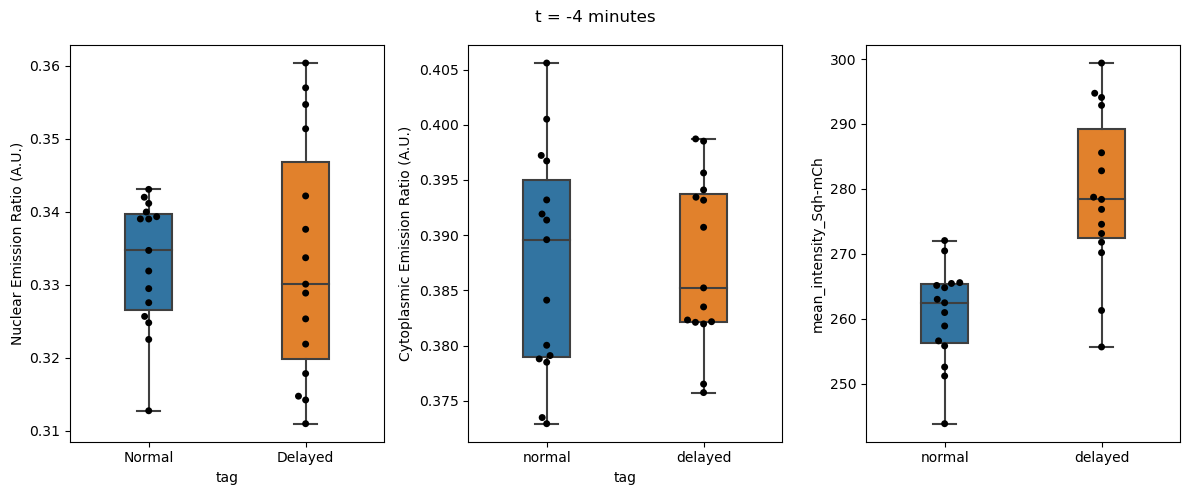

In [204]:
fig, ax = plt.subplots(1,3,figsize=(12,5))
sns.boxplot(ax=ax[0],x='tag', y='correction', data=df_20220117_s5_t0_z08,
           order=['normal', 'delayed'], width=0.3)
sns.swarmplot(ax=ax[0],x='tag', y='correction', data=df_20220117_s5_t0_z08,
              order=['normal', 'delayed'], color='black')
sns.boxplot(ax=ax[2], x='tag', y='mean_intensity_Sqh-mCh', data=df_20220117_s5_t0_z08,
           order=['normal', 'delayed'], width=0.3)
sns.swarmplot(ax=ax[2],x='tag', y='mean_intensity_Sqh-mCh', data=df_20220117_s5_t0_z08,
              order=['normal', 'delayed'], color='black')
sns.boxplot(ax=ax[1],x='tag', y='cyto correction', data=df_20220117_s5_t0_z08,
           order=['normal', 'delayed'], width=0.3)
sns.swarmplot(ax=ax[1],x='tag', y='cyto correction', data=df_20220117_s5_t0_z08,
              order=['normal', 'delayed'], color='black')
ax[0].set_ylabel('Nuclear Emission Ratio (A.U.)')
ax[1].set_ylabel('Cytoplasmic Emission Ratio (A.U.)')
ax[0].set_xticks([0,1])
ax[0].set_xticklabels(['Normal', 'Delayed'])
plt.suptitle('t = -4 minutes')
plt.xlabel('')
plt.tight_layout()
#plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

In [119]:
df.to_csv('../outputs/merged_data.csv') # Save the data

The data above seems to show that even before NEB (in Series 5), the trend still holds where Cdk1 activity, as read out by the FRET biosensor, is higher in delayed nuclei than in normal nuclei. At the beginning of the movie, only then do we see that there is little to no difference between the emission ratios of normal or delayed nuclei.

# Conclusion
I think that at this point I have exhausted the analysis for the Cyclin B mutant dataset and have two potential conclusions:

1) That the Cdk1-FRET biosensor is not sensitive enough to detect the difference in Cdk1 activity between normal and delayed nuclei or 
2) Cyclin B half dose caused Cdk1 to become limiting

In [435]:
df.iloc[0].loc[['mean_intensity_Sqh-mCh', 'mean_intensity_YFP',
               'mean_intensity_CFP', 'mean_intensity_FRET',
               'YFP/CFP', 'FRET/CFP']]

mean_intensity_Sqh-mCh    261.926214
mean_intensity_YFP        427.178317
mean_intensity_CFP         312.86699
mean_intensity_FRET       265.351133
YFP/CFP                     1.365367
FRET/CFP                    0.848128
Name: 18, dtype: object

In [436]:
signal = 0.848 - 0.38 - 0.11*1.365

In [437]:
signal

0.31784999999999997

In [444]:
df['correction'] = df['FRET/CFP'] - 0.38 - (0.11 * df['YFP/CFP']) # Given the calculations Fabio and I did

In [478]:
stats.spearmanr(a=df['centroid-1'], b=df['correction'])

SpearmanrResult(correlation=-0.32649662813179087, pvalue=3.468778721327418e-13)

In [467]:
df['correction'].std()

0.026167711876170785

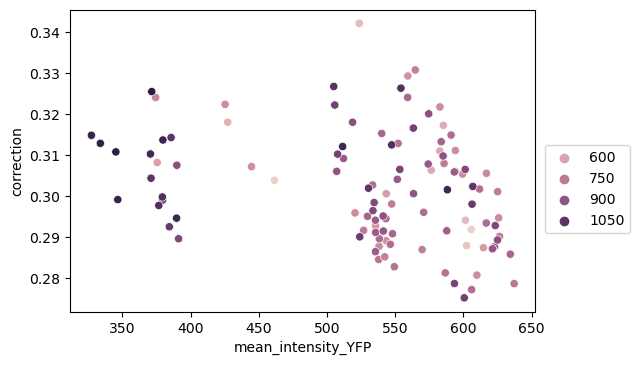

In [476]:
sns.scatterplot(x='mean_intensity_YFP', y='correction', data=df[df['tag'] != 'other'], hue='centroid-0')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

In [ ]:
sns.scatterplot(x='mean_intensity_YFP', y

<AxesSubplot:xlabel='tag', ylabel='correction'>

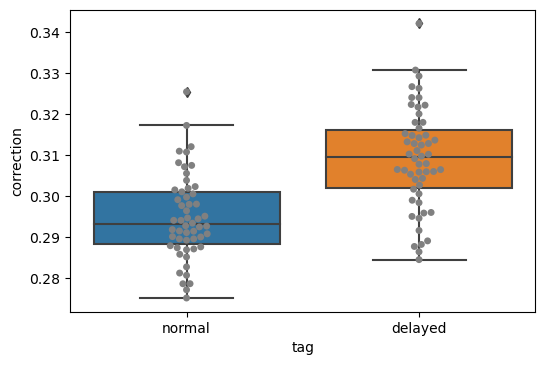

In [448]:
sns.boxplot(x='tag', y='correction', data=df, order=['normal', 'delayed'])
sns.swarmplot(x='tag', y='correction', data=df, order=['normal', 'delayed'], color='gray')

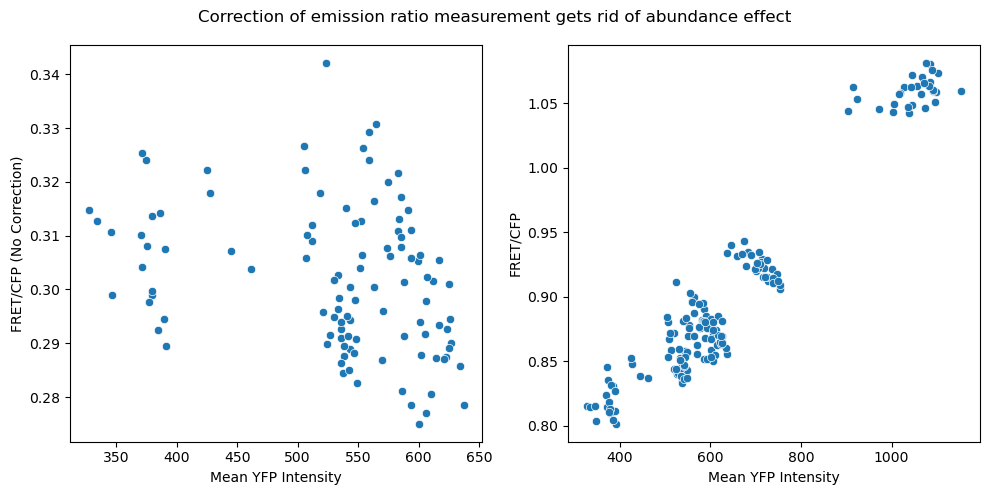

In [583]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(ax=ax[0],x='mean_intensity_YFP', y='correction', 
            data = df[df['tag'] != 'other'])
ax[0].set_ylabel('FRET/CFP (Corrected)')

sns.scatterplot(ax=ax[1],x='mean_intensity_YFP', y='FRET/CFP', 
            data = df[df['tag'] != 'other'])
ax[0].set_ylabel('FRET/CFP (No Correction)')

ax[0].set_xlabel('Mean YFP Intensity')
ax[1].set_xlabel('Mean YFP Intensity')
plt.suptitle('Correction of emission ratio measurement gets rid of abundance effect')
plt.tight_layout()
